In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier


diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [2]:
X=diabetes['data']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [3]:
y=diabetes['target']
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [4]:
def evalmetric(y,ypred):
 from scipy.stats import pearsonr
 import numpy as np
 e = y - ypred 
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 crl, _ = pearsonr(y, ypred)
 r2_f = crl*crl
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", round(r2_f, 4))
 print()


In [5]:
diabetes['target']

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [6]:
data = pd.merge(diabetes['data'],diabetes['target'],right_index=True,left_index=True)

<AxesSubplot:>

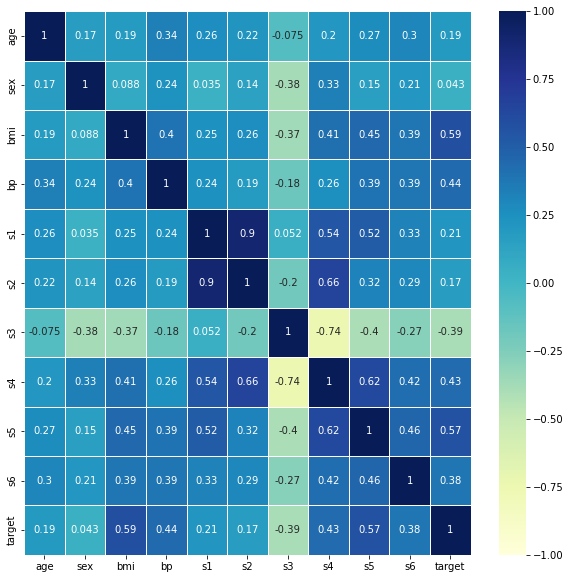

In [7]:
#Note: You can use ChatGPT or notebooks used in the class to find the answers to the questions
#1.Get the correlation between X variables and y variables.(5 pt)
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(data.corr(), vmax=1, vmin=-1, annot=True, linewidths=.8, cmap='YlGnBu')

In [8]:
#2.Split the data into train and test using %25 percent of data(5 pt)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
#3 Using Decision Tree and Random Forecast, get the evaluation scores on test and training data?
#Pick one of the metric such as MAPE and 
#explain briefly why decision tree perform better in training data although it performs worse on test data (15 pt)
print("Decision Tree (Train set)")
tree_model=DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
tree_pred = tree_model.predict(x_train)
evalmetric(y_train,tree_pred)

print("Decision Tree")
tree_model=DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
tree_pred = tree_model.predict(x_test)
evalmetric(y_test,tree_pred)

print("Random Forest")
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)
evalmetric(y_test,rf_pred)

# Answer: Because in training set decision tree model overfitting cannot generalize 
#         prediction to test data. But random forest decreased this factor and make more better results.

Decision Tree (Train set)
MSE: 0.0
RMSE: 0.0
MAE: 0.0
MAPE: 0.0
R-Squared: 1.0

Decision Tree
MSE: 5811.711711711711
RMSE: 76.23458343633624
MAE: 61.31531531531532
MAPE: 49.740887878909305
R-Squared: 0.2294

Random Forest
MSE: 3805.3759351351355
RMSE: 61.68772921039593
MAE: 48.916396396396415
MAPE: 40.53137309666417
R-Squared: 0.2994



In [10]:
#4 Use boosting methods (XGBoost, LightGBM, GradingBoosting Method and CatBoost) to get
# the evaluation scores on test and training data
#Which methods gave  best performance of Boosting technqie on test data based on MAPE metric?
#With this method, Did you get better result from Random Forest on test data based on MAPE metric?(25 pt)

#Gradient Boosting
gbm = GradientBoostingRegressor(random_state=0)
gbm.fit(x_train, y_train)
gbm_pred = gbm.predict(x_test)
evalmetric(y_test,gbm_pred)

#XGBoost
xgbt = XGBRegressor(random_state = 0)
xgbt.fit(x_train, y_train)
xgbt_pred = xgbt.predict(x_test)
evalmetric(y_test,xgbt_pred)

#CatBoost
cbt = CatBoostRegressor(random_seed=0)
cbt.fit(x_train, y_train)
cbt_pred = cbt.predict(x_test)
evalmetric(y_test,cbt_pred)

#LightGBM
lgb_model= LGBMRegressor(random_state=0)
lgb_model.fit(x_train,y_train)
lgb_pred = lgb_model.predict(x_test)
evalmetric(y_test,lgb_pred)

# Answer: Based on MAPE, CatBoost performs more better than other boosintg technique
# Answer: Yes,except XGBoost, all boosting technique give more better results than random forest

MSE: 3889.4830246937663
RMSE: 62.36571994849227
MAE: 48.97375848019735
MAPE: 40.10647096251489
R-Squared: 0.3001

MSE: 4342.955839658835
RMSE: 65.90110651315982
MAE: 50.85779403136657
MAPE: 41.25538425199006
R-Squared: 0.2803

Learning rate set to 0.034381
0:	learn: 77.9195175	total: 135ms	remaining: 2m 15s
1:	learn: 76.8783524	total: 137ms	remaining: 1m 8s
2:	learn: 75.7655358	total: 138ms	remaining: 46s
3:	learn: 74.7573095	total: 140ms	remaining: 34.9s
4:	learn: 73.8304415	total: 142ms	remaining: 28.2s
5:	learn: 72.8544107	total: 143ms	remaining: 23.8s
6:	learn: 72.0129314	total: 145ms	remaining: 20.5s
7:	learn: 71.0138568	total: 146ms	remaining: 18.1s
8:	learn: 70.1656148	total: 148ms	remaining: 16.3s
9:	learn: 69.2877889	total: 149ms	remaining: 14.8s
10:	learn: 68.4671326	total: 151ms	remaining: 13.5s
11:	learn: 67.6688075	total: 152ms	remaining: 12.5s
12:	learn: 66.9935975	total: 154ms	remaining: 11.7s
13:	learn: 66.4362511	total: 155ms	remaining: 10.9s
14:	learn: 65.7748318	tota

208:	learn: 33.4456146	total: 468ms	remaining: 1.77s
209:	learn: 33.3870080	total: 470ms	remaining: 1.77s
210:	learn: 33.2318582	total: 471ms	remaining: 1.76s
211:	learn: 33.1875206	total: 473ms	remaining: 1.76s
212:	learn: 33.1773679	total: 475ms	remaining: 1.75s
213:	learn: 33.0952282	total: 476ms	remaining: 1.75s
214:	learn: 33.0196028	total: 478ms	remaining: 1.75s
215:	learn: 32.9884932	total: 480ms	remaining: 1.74s
216:	learn: 32.9791427	total: 481ms	remaining: 1.74s
217:	learn: 32.9615867	total: 483ms	remaining: 1.73s
218:	learn: 32.9181435	total: 484ms	remaining: 1.73s
219:	learn: 32.7970420	total: 486ms	remaining: 1.72s
220:	learn: 32.7748838	total: 488ms	remaining: 1.72s
221:	learn: 32.6610200	total: 489ms	remaining: 1.72s
222:	learn: 32.6509957	total: 491ms	remaining: 1.71s
223:	learn: 32.5257634	total: 492ms	remaining: 1.71s
224:	learn: 32.5024685	total: 494ms	remaining: 1.7s
225:	learn: 32.4936330	total: 495ms	remaining: 1.7s
226:	learn: 32.4180148	total: 497ms	remaining: 1

413:	learn: 23.0873427	total: 801ms	remaining: 1.13s
414:	learn: 23.0029119	total: 803ms	remaining: 1.13s
415:	learn: 22.9872380	total: 804ms	remaining: 1.13s
416:	learn: 22.9498607	total: 806ms	remaining: 1.13s
417:	learn: 22.9049467	total: 807ms	remaining: 1.12s
418:	learn: 22.9002564	total: 809ms	remaining: 1.12s
419:	learn: 22.8951127	total: 810ms	remaining: 1.12s
420:	learn: 22.8209150	total: 812ms	remaining: 1.12s
421:	learn: 22.7893285	total: 813ms	remaining: 1.11s
422:	learn: 22.7638388	total: 815ms	remaining: 1.11s
423:	learn: 22.7464669	total: 817ms	remaining: 1.11s
424:	learn: 22.6964506	total: 819ms	remaining: 1.11s
425:	learn: 22.6758684	total: 820ms	remaining: 1.1s
426:	learn: 22.6099717	total: 822ms	remaining: 1.1s
427:	learn: 22.5376131	total: 823ms	remaining: 1.1s
428:	learn: 22.5007638	total: 825ms	remaining: 1.1s
429:	learn: 22.4679482	total: 827ms	remaining: 1.09s
430:	learn: 22.4008790	total: 828ms	remaining: 1.09s
431:	learn: 22.3975568	total: 830ms	remaining: 1.0

610:	learn: 16.4020716	total: 1.13s	remaining: 721ms
611:	learn: 16.3910249	total: 1.13s	remaining: 719ms
612:	learn: 16.3565539	total: 1.14s	remaining: 717ms
613:	learn: 16.3406674	total: 1.14s	remaining: 715ms
614:	learn: 16.3318322	total: 1.14s	remaining: 713ms
615:	learn: 16.2998747	total: 1.14s	remaining: 711ms
616:	learn: 16.2644395	total: 1.14s	remaining: 709ms
617:	learn: 16.2441165	total: 1.14s	remaining: 707ms
618:	learn: 16.1939044	total: 1.15s	remaining: 705ms
619:	learn: 16.1490179	total: 1.15s	remaining: 704ms
620:	learn: 16.1165078	total: 1.15s	remaining: 702ms
621:	learn: 16.0840429	total: 1.15s	remaining: 700ms
622:	learn: 16.0773542	total: 1.15s	remaining: 698ms
623:	learn: 16.0237818	total: 1.16s	remaining: 696ms
624:	learn: 16.0019265	total: 1.16s	remaining: 694ms
625:	learn: 15.9792450	total: 1.16s	remaining: 692ms
626:	learn: 15.9776450	total: 1.16s	remaining: 690ms
627:	learn: 15.9559372	total: 1.16s	remaining: 688ms
628:	learn: 15.9100889	total: 1.16s	remaining:

786:	learn: 12.1875090	total: 1.47s	remaining: 397ms
787:	learn: 12.1625721	total: 1.47s	remaining: 395ms
788:	learn: 12.1155192	total: 1.47s	remaining: 394ms
789:	learn: 12.1079430	total: 1.47s	remaining: 392ms
790:	learn: 12.0996624	total: 1.47s	remaining: 390ms
791:	learn: 12.0923058	total: 1.48s	remaining: 388ms
792:	learn: 12.0779611	total: 1.48s	remaining: 386ms
793:	learn: 12.0587981	total: 1.48s	remaining: 384ms
794:	learn: 12.0513337	total: 1.48s	remaining: 382ms
795:	learn: 12.0302099	total: 1.48s	remaining: 380ms
796:	learn: 12.0145559	total: 1.49s	remaining: 378ms
797:	learn: 11.9891814	total: 1.49s	remaining: 376ms
798:	learn: 11.9592102	total: 1.49s	remaining: 374ms
799:	learn: 11.9458759	total: 1.49s	remaining: 373ms
800:	learn: 11.9169251	total: 1.49s	remaining: 371ms
801:	learn: 11.9154519	total: 1.49s	remaining: 369ms
802:	learn: 11.8986637	total: 1.5s	remaining: 367ms
803:	learn: 11.8854800	total: 1.5s	remaining: 365ms
804:	learn: 11.8649507	total: 1.5s	remaining: 36

978:	learn: 9.0218571	total: 1.79s	remaining: 38.5ms
979:	learn: 9.0033784	total: 1.8s	remaining: 36.7ms
980:	learn: 8.9778047	total: 1.8s	remaining: 34.8ms
981:	learn: 8.9589965	total: 1.8s	remaining: 33ms
982:	learn: 8.9485186	total: 1.8s	remaining: 31.2ms
983:	learn: 8.9403465	total: 1.8s	remaining: 29.3ms
984:	learn: 8.9291238	total: 1.8s	remaining: 27.5ms
985:	learn: 8.9024863	total: 1.81s	remaining: 25.6ms
986:	learn: 8.8833024	total: 1.81s	remaining: 23.8ms
987:	learn: 8.8697649	total: 1.81s	remaining: 22ms
988:	learn: 8.8602712	total: 1.81s	remaining: 20.2ms
989:	learn: 8.8535899	total: 1.81s	remaining: 18.3ms
990:	learn: 8.8206160	total: 1.81s	remaining: 16.5ms
991:	learn: 8.8125570	total: 1.82s	remaining: 14.7ms
992:	learn: 8.7835221	total: 1.82s	remaining: 12.8ms
993:	learn: 8.7659290	total: 1.82s	remaining: 11ms
994:	learn: 8.7651728	total: 1.82s	remaining: 9.15ms
995:	learn: 8.7504341	total: 1.82s	remaining: 7.32ms
996:	learn: 8.7427079	total: 1.82s	remaining: 5.49ms
997:	

In [11]:
#for the other question use following data. Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

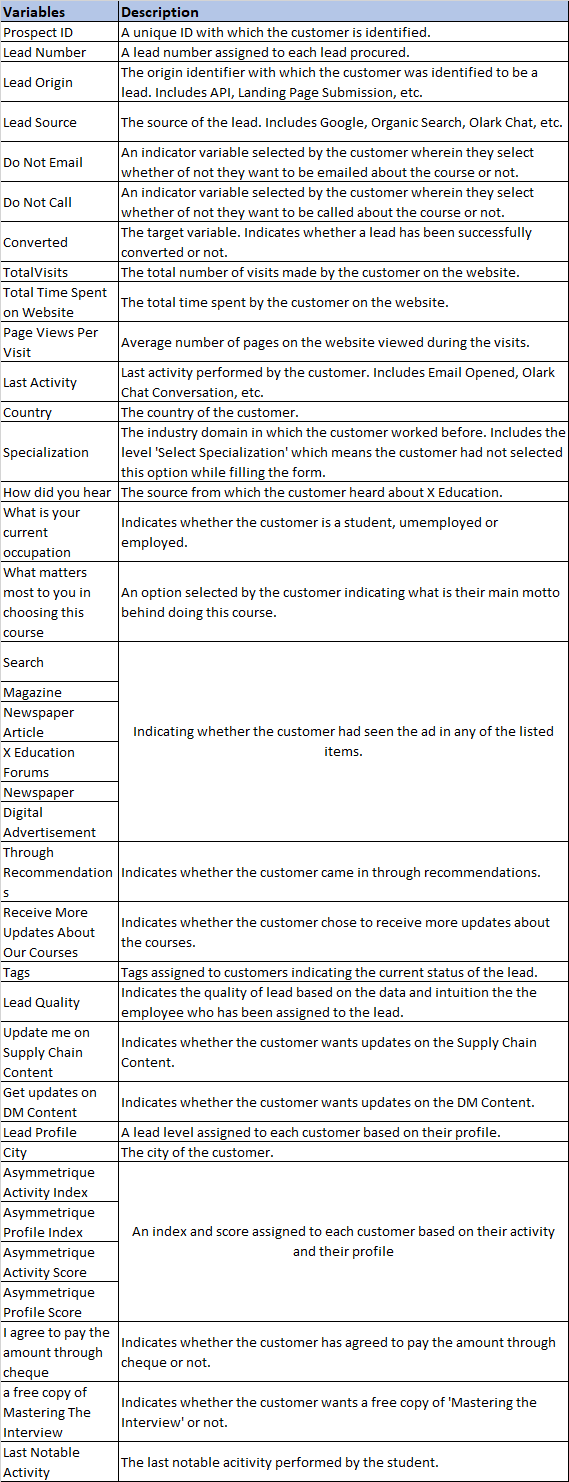

In [12]:
#Q5 (10 pt) There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
col=df.columns
for i in col:
    if df[i].dtype == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df[i] = df[i].fillna(df[i].mean())

df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [14]:
#Q6-(10 pt)Convert categorical variables to numerical with label encoder method .
#Drop Prospect ID	Lead Number from the variables and use converted as target variables.
#Split data into train and test using 30% of the data 
encoder = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = encoder.fit_transform(df[i])

df.drop(['Prospect ID','Lead Number'], axis=1)

X = df.drop('Converted', axis=1)
y = df['Converted']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
#Q7(30 pt)Use decison tree, random forest andboosting methods (XGBoost, LightGBM, GradingBoosting Method) to get
# the accuracy scores on test  data
#Which methods gave  best performance on test data based on accuracy metric?

#Decision Tree
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
tree_pred = tree_model.predict(x_test)
print('Decision Tree:',accuracy_score(y_test, tree_pred),end='\n')

#Random Forest
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)
print('Random Forest:',accuracy_score(y_test,rf_pred))

#Graadient  Boosting
gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(x_train, y_train)
gbm_pred = gbm.predict(x_test)
print('Gradient Boosting:',accuracy_score(y_test,gbm_pred))

#XGBoost
xgbt = XGBClassifier(random_state = 0)
xgbt.fit(x_train, y_train)
xgbt_pred = xgbt.predict(x_test)
print('XGBoost:',accuracy_score(y_test,xgbt_pred))

#CatBoost
cbt = CatBoostClassifier(random_seed=0)
cbt.fit(x_train, y_train)
cbt_pred = cbt.predict(x_test)
print('CatBoost:',accuracy_score(y_test,cbt_pred))

#LightGBM
lgb_model= LGBMClassifier(random_state=0)
lgb_model.fit(x_train,y_train)
lgb_pred = lgb_model.predict(x_test)
print('LightGBM:',accuracy_score(y_test,lgb_pred))

# Answer: Based on accuracy metric, LightGBM give more better result.

Decision Tree: 0.8957431457431457
Random Forest: 0.9217171717171717
Gradient Boosting: 0.9271284271284271
XGBoost: 0.9415584415584416
Learning rate set to 0.022863
0:	learn: 0.6714353	total: 4.11ms	remaining: 4.11s
1:	learn: 0.6530485	total: 8.07ms	remaining: 4.03s
2:	learn: 0.6340974	total: 12ms	remaining: 4s
3:	learn: 0.6163726	total: 32ms	remaining: 7.97s
4:	learn: 0.6028575	total: 35.9ms	remaining: 7.14s
5:	learn: 0.5882503	total: 39.5ms	remaining: 6.55s
6:	learn: 0.5715341	total: 43.4ms	remaining: 6.16s
7:	learn: 0.5584978	total: 47.3ms	remaining: 5.86s
8:	learn: 0.5463472	total: 51.1ms	remaining: 5.63s
9:	learn: 0.5355417	total: 54.9ms	remaining: 5.43s
10:	learn: 0.5232029	total: 58.6ms	remaining: 5.27s
11:	learn: 0.5120408	total: 62.5ms	remaining: 5.15s
12:	learn: 0.5012437	total: 66.4ms	remaining: 5.04s
13:	learn: 0.4924843	total: 70.3ms	remaining: 4.95s
14:	learn: 0.4827001	total: 74ms	remaining: 4.86s
15:	learn: 0.4731255	total: 77.6ms	remaining: 4.77s
16:	learn: 0.4639175	to

163:	learn: 0.2011881	total: 699ms	remaining: 3.56s
164:	learn: 0.2006333	total: 703ms	remaining: 3.56s
165:	learn: 0.2002631	total: 708ms	remaining: 3.56s
166:	learn: 0.1994870	total: 712ms	remaining: 3.55s
167:	learn: 0.1991877	total: 716ms	remaining: 3.55s
168:	learn: 0.1983488	total: 721ms	remaining: 3.54s
169:	learn: 0.1980499	total: 725ms	remaining: 3.54s
170:	learn: 0.1977802	total: 729ms	remaining: 3.54s
171:	learn: 0.1975977	total: 733ms	remaining: 3.53s
172:	learn: 0.1974329	total: 737ms	remaining: 3.52s
173:	learn: 0.1971343	total: 742ms	remaining: 3.52s
174:	learn: 0.1969755	total: 746ms	remaining: 3.52s
175:	learn: 0.1967535	total: 750ms	remaining: 3.51s
176:	learn: 0.1964108	total: 754ms	remaining: 3.5s
177:	learn: 0.1961374	total: 758ms	remaining: 3.5s
178:	learn: 0.1957424	total: 762ms	remaining: 3.5s
179:	learn: 0.1950058	total: 766ms	remaining: 3.49s
180:	learn: 0.1946615	total: 771ms	remaining: 3.49s
181:	learn: 0.1940381	total: 775ms	remaining: 3.48s
182:	learn: 0.1

324:	learn: 0.1682222	total: 1.42s	remaining: 2.94s
325:	learn: 0.1677835	total: 1.42s	remaining: 2.94s
326:	learn: 0.1676549	total: 1.43s	remaining: 2.94s
327:	learn: 0.1675093	total: 1.43s	remaining: 2.93s
328:	learn: 0.1672642	total: 1.43s	remaining: 2.93s
329:	learn: 0.1669882	total: 1.44s	remaining: 2.92s
330:	learn: 0.1668347	total: 1.44s	remaining: 2.92s
331:	learn: 0.1666016	total: 1.45s	remaining: 2.91s
332:	learn: 0.1664621	total: 1.45s	remaining: 2.91s
333:	learn: 0.1663110	total: 1.46s	remaining: 2.9s
334:	learn: 0.1662825	total: 1.46s	remaining: 2.9s
335:	learn: 0.1661632	total: 1.46s	remaining: 2.89s
336:	learn: 0.1660544	total: 1.47s	remaining: 2.89s
337:	learn: 0.1659195	total: 1.47s	remaining: 2.88s
338:	learn: 0.1658771	total: 1.48s	remaining: 2.88s
339:	learn: 0.1658283	total: 1.48s	remaining: 2.87s
340:	learn: 0.1656695	total: 1.49s	remaining: 2.87s
341:	learn: 0.1655076	total: 1.49s	remaining: 2.87s
342:	learn: 0.1654099	total: 1.49s	remaining: 2.86s
343:	learn: 0.

488:	learn: 0.1457021	total: 2.12s	remaining: 2.21s
489:	learn: 0.1456893	total: 2.12s	remaining: 2.21s
490:	learn: 0.1455071	total: 2.13s	remaining: 2.21s
491:	learn: 0.1455040	total: 2.13s	remaining: 2.2s
492:	learn: 0.1453559	total: 2.14s	remaining: 2.2s
493:	learn: 0.1453518	total: 2.14s	remaining: 2.19s
494:	learn: 0.1451362	total: 2.14s	remaining: 2.19s
495:	learn: 0.1450889	total: 2.15s	remaining: 2.18s
496:	learn: 0.1450803	total: 2.15s	remaining: 2.18s
497:	learn: 0.1449773	total: 2.16s	remaining: 2.17s
498:	learn: 0.1448565	total: 2.16s	remaining: 2.17s
499:	learn: 0.1447476	total: 2.16s	remaining: 2.16s
500:	learn: 0.1447420	total: 2.17s	remaining: 2.16s
501:	learn: 0.1446993	total: 2.17s	remaining: 2.15s
502:	learn: 0.1445880	total: 2.18s	remaining: 2.15s
503:	learn: 0.1443710	total: 2.18s	remaining: 2.15s
504:	learn: 0.1441479	total: 2.18s	remaining: 2.14s
505:	learn: 0.1440304	total: 2.19s	remaining: 2.14s
506:	learn: 0.1438631	total: 2.19s	remaining: 2.13s
507:	learn: 0.

660:	learn: 0.1273551	total: 2.83s	remaining: 1.45s
661:	learn: 0.1272710	total: 2.83s	remaining: 1.45s
662:	learn: 0.1272688	total: 2.84s	remaining: 1.44s
663:	learn: 0.1271488	total: 2.84s	remaining: 1.44s
664:	learn: 0.1270641	total: 2.85s	remaining: 1.43s
665:	learn: 0.1269548	total: 2.85s	remaining: 1.43s
666:	learn: 0.1268615	total: 2.85s	remaining: 1.43s
667:	learn: 0.1268573	total: 2.86s	remaining: 1.42s
668:	learn: 0.1267753	total: 2.86s	remaining: 1.42s
669:	learn: 0.1266632	total: 2.87s	remaining: 1.41s
670:	learn: 0.1266597	total: 2.87s	remaining: 1.41s
671:	learn: 0.1266135	total: 2.88s	remaining: 1.4s
672:	learn: 0.1265083	total: 2.88s	remaining: 1.4s
673:	learn: 0.1263907	total: 2.88s	remaining: 1.39s
674:	learn: 0.1262566	total: 2.89s	remaining: 1.39s
675:	learn: 0.1262502	total: 2.89s	remaining: 1.39s
676:	learn: 0.1261669	total: 2.9s	remaining: 1.38s
677:	learn: 0.1261057	total: 2.9s	remaining: 1.38s
678:	learn: 0.1260367	total: 2.9s	remaining: 1.37s
679:	learn: 0.125

839:	learn: 0.1126428	total: 3.55s	remaining: 676ms
840:	learn: 0.1125648	total: 3.55s	remaining: 672ms
841:	learn: 0.1124849	total: 3.56s	remaining: 668ms
842:	learn: 0.1123573	total: 3.56s	remaining: 664ms
843:	learn: 0.1122584	total: 3.57s	remaining: 659ms
844:	learn: 0.1121499	total: 3.57s	remaining: 655ms
845:	learn: 0.1121477	total: 3.57s	remaining: 651ms
846:	learn: 0.1120504	total: 3.58s	remaining: 646ms
847:	learn: 0.1119920	total: 3.58s	remaining: 642ms
848:	learn: 0.1118925	total: 3.58s	remaining: 638ms
849:	learn: 0.1117930	total: 3.59s	remaining: 633ms
850:	learn: 0.1116915	total: 3.59s	remaining: 629ms
851:	learn: 0.1116574	total: 3.6s	remaining: 625ms
852:	learn: 0.1116559	total: 3.6s	remaining: 621ms
853:	learn: 0.1115633	total: 3.6s	remaining: 616ms
854:	learn: 0.1114809	total: 3.61s	remaining: 612ms
855:	learn: 0.1114239	total: 3.61s	remaining: 608ms
856:	learn: 0.1114225	total: 3.62s	remaining: 603ms
857:	learn: 0.1113531	total: 3.62s	remaining: 599ms
858:	learn: 0.1

LightGBM: 0.9437229437229437
